# Sentence Segmantation 
## Using Library spacy

In [1]:
import spacy 
nlp=spacy.load('en_core_web_sm')
doc1=nlp("Hi! My name is Chaima.I'm 22 years old . I live in algeria  ")
for sent in doc1.sents:
    print(sent)

Hi!
My name is Chaima.
I'm 22 years old .
I live in algeria  


In [2]:
doc1[7].is_sent_start #word 8 is start of sentence or not

True

In [3]:
#change sentences in list 
doc_sents = [sent for sent in doc1.sents] 
doc_sents

[Hi!, My name is Chaima., I'm 22 years old ., I live in algeria  ]

In [4]:
#call sentence 
print(list(doc1.sents)[3])

I live in algeria  


In [5]:
#get index start word and last word  of second sentense 
print(doc_sents[1].start, doc_sents[1].end)

2 7


In [6]:
#check all words if  it's sentence start or not 
doc2 = nlp(u'This is a sentence. This is a sentence. This is a sentence.') 
for token in doc2:
    print(token.is_sent_start, ' '+token.text) 

True  This
False  is
False  a
False  sentence
False  .
True  This
False  is
False  a
False  sentence
False  .
True  This
False  is
False  a
False  sentence
False  .


In [7]:
# if i ysed (')then used(")he calcul "" like one sentence
doc3 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker') 
for sent in doc3.sents: 
    print(sent) 

"Management is doing things right; leadership is doing the right things."
-Peter Drucker


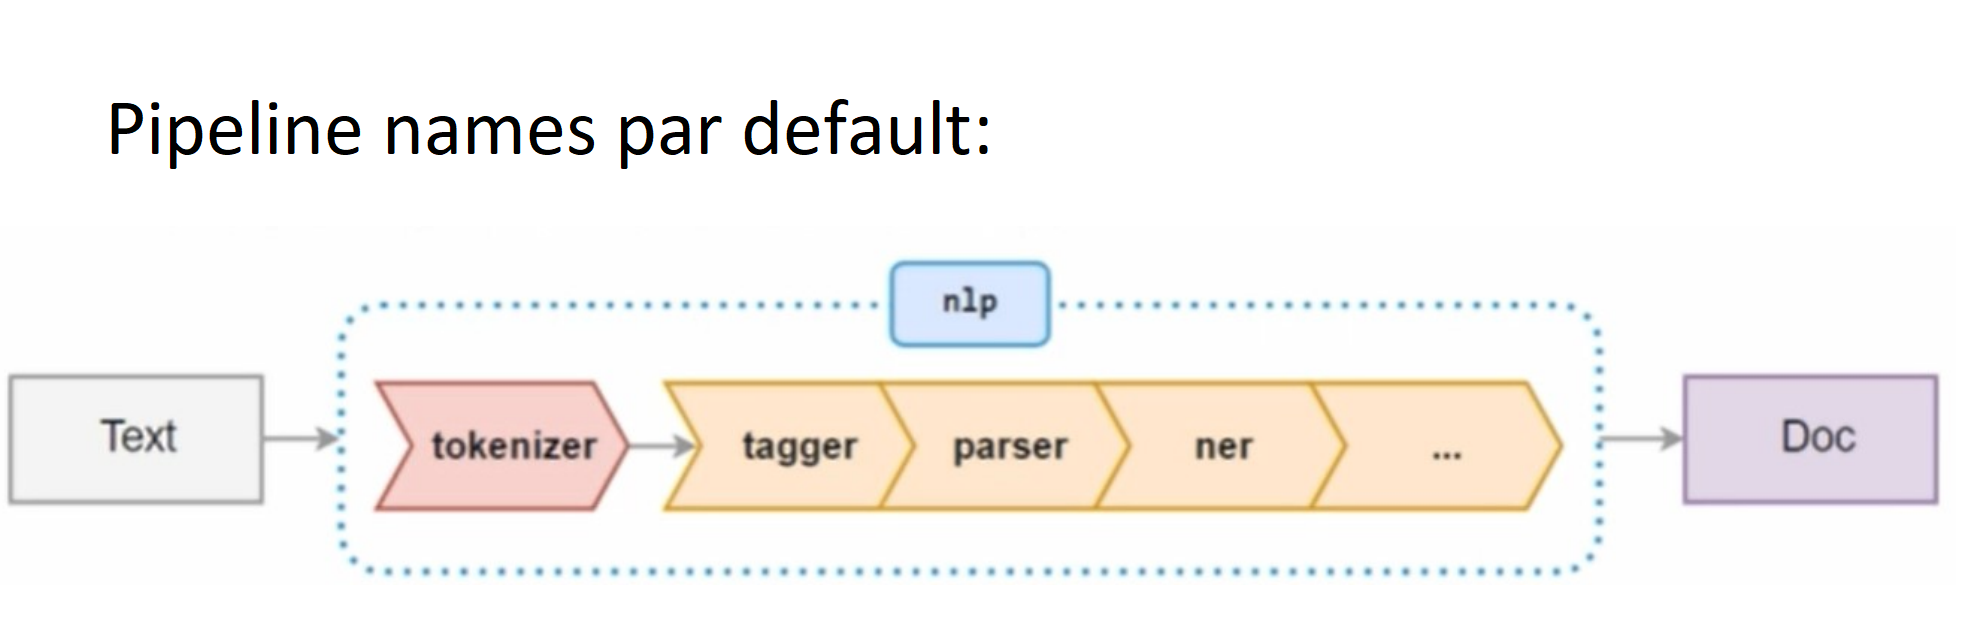

### - add set_custum_boundaris in pipeline
####   - set_custum_boundaris:
is function that he can seperate with sentence using (;) that between words

In [8]:
#par default
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [9]:
from spacy.language import Language

@Language.component("set_custom_boundaries")
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == ';':
            doc[token.i+1].is_sent_start = True
    return doc
nlp.add_pipe("set_custom_boundaries", before='parser')

nlp.pipe_names

['tok2vec',
 'tagger',
 'set_custom_boundaries',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [10]:
doc4 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker')
for sent in doc4.sents:
    print(sent)

"Management is doing things right;
leadership is doing the right things."
-Peter Drucker


## Using NLTK library

In [11]:
from nltk.tokenize import sent_tokenize

EXAMPLE_TEXT = """
Hello Mr. Smith, how are you doing today? The weather is great, 
and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard.
"""
EXAMPLE_TEXT1 = '''
أبو عبد الله محمد بن موسى الخوارزمي عالم رياضيات وفلك
وجغرافيا مسلم. يكنى باسم الخوارزمي وأبي جعفر. قيل أنه ولد حوالي 164هـ 781م (وهو غير مؤكد) وقيل أنه توفي بعد 232 هـ أي (بعد 847م). يعتبر
من أوائل علماء الرياضيات المسلمين حيث ساهمت أعماله بدور كبير في تقدم الرياضيات في عصره. اتصل بالخليفة العباسي المأمون وعمل في بيت الحكمة في 
بغداد وكسب ثقة الخليفة إذ ولاه المأمون بيت الحكمة كما عهد إليه برسم خارطة للأرض عمل فيها أكثر من سبعين جغرافيا. قبل وفاته في 850 م/232 هـ
كان الخوارزمي قد ترك العديد من المؤلفات في علوم الرياضيات والفلك والجغرافيا ومن أهمها كتاب المختصر في حساب الجبر والمقابلة الذي يعد أهم كتبه
'''

In [ ]:
import nltk 
nltk.__version__ 
nltk.download() 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
for s in sent_tokenize(EXAMPLE_TEXT) : 
    print(s)
    print('----------------------')

In [ ]:
from nltk.tokenize import PunktSentenceTokenizer
custom_sent_tokenizer = PunktSentenceTokenizer(EXAMPLE_TEXT)
tokenized = custom_sent_tokenizer.tokenize(EXAMPLE_TEXT)
tokenized[:10]

In [ ]:
for s in sent_tokenize(EXAMPLE_TEXT1) : 
    print(s)
    print('----------------------')